### Настройка окружения

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd  drive/MyDrive/'Colab Notebooks'/Coloring-greyscale-images/Alpha-version/

/content/drive/MyDrive/Colab Notebooks/Coloring-greyscale-images/Alpha-version


In [ ]:
# !git pull origin alhpa-version

From https://github.com/Evgev/Coloring-greyscale-images
 * branch            alhpa-version -> FETCH_HEAD
Already up to date.


In [ ]:
!ls -ar Cats_lapkins/

'Японский бобтейл'	        Селкирк-рекс		    'Канадский сфинкс'
 Эльф			       'Саванна (Ашера)'	    'Египетская мау'
'Экзотическая кошка'	        Рэгдолл			    'Европейская короткошерстная кошка'
'Шотландская прямоухая кошка'  'Русская голубая кошка'	    'Донской сфинкс'
'Шотландская вислоухая кошка'   Рагамаффин		     Девон-рекс
 Шиншилла		        Пиксибоб		    'Гималайская кошка'
 Шартрез		        Петерболд		    'Гавана браун'
 Шантильи-тиффани	       'Персидская кошка'	     Бурмилла
 Чаузи			        Оцикет			    'Бурманская кошка'
'Уральский рекс'	       'Ориентальная кошка'	    'Британская короткошерстная кошка'
'Турецкий ван'		       'Норвежская лесная кошка'    'Британская длинношерстная кошка'
'Турецкая ангора'	        Нибелунг		    'Бомбейская кошка'
'Тонкинская кошка'	       'Немецкий рекс'		    'Бирманская кошка'
 Тойгер			       'Невская маскарадная кошка'  'Бенгальская кошка'
'Тайская кошка'		        Мэнкс			     Бамбино
'Сомалийская кошка'	       'Меконгский

In [ ]:
! unzip  ../datathon_comanda_AA-main.zip

In [ ]:
!git branch

* alhpa-version


### Альфа версия

In [ ]:
!pip install fiftyone openimages

In [ ]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import shutil  # Импортируем shutil для копирования файлов



#### Загрузка изображений

In [ ]:
def get_dataset(path_to_images_folder: str = None, dataset_name: str = None , desired_size = (400, 400), max_samples: int = None ):
  """
  Функия загружает изображения либо из заданной папки либо из Open Images Dataset, приводит их к заданому размеру.

  params:
    path_to_images_folder: путь до папки с изображениями
    dataset_name: название датасета в Open Images
    desired_size: размер изображений на выходе

  return:
    np.array(dtype = uint8) shape = (количество изображений, desired_size, 3)
  """
  import cv2


  def list_files_recursively(directory):
      file_list = []
      for root, dirs, files in os.walk(directory):
          for file in files:
              file_list.append(os.path.join(root, file))
      return file_list

  if dataset_name is not None:

    import fiftyone as fo
    import fiftyone.zoo as foz

    # Загружаем Open Images Dataset
    dataset = foz.load_zoo_dataset(dataset_name, max_samples=max_samples)

    # Папка, куда будут сохраняться изображения
    images_dir = os.path.join(os.getcwd(), path_to_images_folder)  # Путь к директории
    os.makedirs(images_dir, exist_ok=True)  # Создаем директорию, если она не существует

    # Перебираем образцы и копируем их изображения
    for sample in dataset:
        image_path = sample.filepath  # Получаем путь к изображению
        output_path = os.path.join(images_dir, os.path.basename(image_path))  # Путь для сохранения

        # Копируем изображение в выходную директорию
        shutil.copy(image_path, output_path)  # Копирование изображения

  if path_to_images_folder is not None:
    # Путь к папке с изображениями
    images_dir = path_to_images_folder


  images_list = []

  # Проходим по всем файлам в директории
  for filename in list_files_recursively(images_dir):

      if filename.endswith(".jpg"):  # Проверяем, что файл является изображением в формате JPG

          # Загружаем изображение в BGR
          image = cv2.imread(filename, cv2.IMREAD_COLOR)

          if (image is not None) and (image.shape[:2] > desired_size):  # Проверяем, что изображение успешно загружено
              # Преобразуем BGR в RGB
              image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
              image_resized = cv2.resize(image_rgb, desired_size)
              images_list.append(image_resized)
      if len(images_list) > max_samples: break

  images_array = np.array(images_list, dtype=float)

  # Проверяем размерности и тип массива
  print("Shape of images_array:", images_array.shape)  # (количество изображений, высота, ширина, количество каналов)
  print("Data type of images_array:", images_array.dtype)  # dtype будет uint8


  return images_array



##### Загрузка изображений из openimages

In [ ]:
# images_array_RGB = get_dataset(dataset_name = "open-images-v6", path_to_images_folder = "train_images" , desired_size=(256, 256), max_samples=2000)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v6/train' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'test' to '/root/fiftyone/open-images-v6/test' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading 'open-images-v6' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'train'


 100% |███████████████| 2000/2000 [2.9m elapsed, 0s remaining, 19.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2000/2000 [2.9m elapsed, 0s remaining, 19.7 samples/s]      


Loading 'open-images-v6' split 'test'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'test'


 100% |███████████████| 2000/2000 [1.4m elapsed, 0s remaining, 13.7 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 2000/2000 [1.4m elapsed, 0s remaining, 13.7 samples/s]       


Loading 'open-images-v6' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'validation'


 100% |███████████████| 2000/2000 [1.3m elapsed, 0s remaining, 29.1 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 2000/2000 [1.3m elapsed, 0s remaining, 29.1 samples/s]       


Dataset 'open-images-v6-2000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v6-2000' created


Shape of images_array: (2001, 256, 256, 3)
Data type of images_array: float64


In [ ]:
# images_array_RGB = get_dataset(path_to_images_folder = 'train_images', desired_size=(256, 256), max_samples = 1000)
images_array_RGB = get_dataset(path_to_images_folder = "Cats_lapkins", desired_size=(256, 256), max_samples = 1000)



Shape of images_array: (1001, 256, 256, 3)
Data type of images_array: float64


array([[[147, 115,  78],
        [150, 118,  79],
        [145, 113,  72],
        ...,
        [183, 158, 122],
        [183, 159, 123],
        [183, 159, 123]],

       [[151, 118,  81],
        [148, 116,  77],
        [147, 115,  74],
        ...,
        [182, 158, 122],
        [183, 159, 123],
        [183, 159, 123]],

       [[148, 116,  79],
        [146, 114,  75],
        [145, 113,  72],
        ...,
        [183, 159, 123],
        [183, 159, 123],
        [183, 159, 123]],

       ...,

       [[ 96,  62,  25],
        [ 96,  62,  25],
        [ 92,  58,  21],
        ...,
        [ 84,  89, 119],
        [ 98, 103, 133],
        [104, 109, 139]],

       [[ 91,  57,  21],
        [ 93,  58,  25],
        [ 92,  57,  29],
        ...,
        [ 84,  88, 123],
        [ 96, 102, 128],
        [103, 108, 141]],

       [[ 96,  62,  26],
        [ 93,  58,  26],
        [ 94,  59,  31],
        ...,
        [ 84,  88, 123],
        [ 91,  95, 129],
        [ 98, 102, 142]]], dtype=uint8)
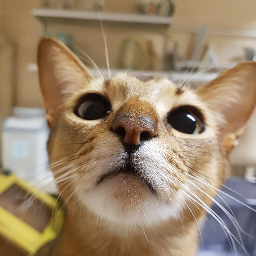

In [ ]:
images_array_RGB[1].astype(np.uint8)

In [83]:

def list_files_recursively(directory):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list

len(list_files_recursively("Cats_lapkins"))

2591

#### Создание обучающей и тестовой выборок

In [ ]:
from sklearn.model_selection import train_test_split

images_array_Lab = np.array([rgb2lab(image/255) for image in images_array_RGB])
# del images_array_RGB

x = images_array_Lab[:,:,:,0]
y = images_array_Lab[:,:,:,1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

del images_array_Lab, x, y


In [ ]:
print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)

(800, 256, 256) (800, 256, 256, 2) float64 float64


#### Создание модели

In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(400, 400, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 200, 200, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 200, 200, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 200, 200, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 100, 100, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 100, 100, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 200, 200, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 200, 200, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 400, 400, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 400, 400, 2)         │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,202 (125.79 KB)

 Trainable params: 32,202 (125.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [68]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(32, (3,3), activation='linear', padding='same', strides=1 ))
model.add(Conv2D(64, (3,3), activation='linear', padding='same', strides=1 ))
model.add(Dense(128, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dense(4, activation='linear'))
model.add(Dense(2, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [69]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, None, None, 32)      │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, None, None, 64)      │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, None, None, 128)     │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, None, None, 64)      │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, None, None, 32)      │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, None, None, 16)      │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, None, None, 8)       │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, None, None, 4)       │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, None, None, 2)       │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,182 (149.15 KB)

 Trainable params: 38,182 (149.15 KB)

 Non-trainable params: 0 (0.00 B)

None


In [75]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

### Обучение модели

In [ ]:


x_train = np.expand_dims(x_train, axis = 3)
y_train /= 128

In [78]:

history = model.fit(x=x_train,
    y=y_train,
    batch_size=6,
    epochs=5,
    verbose = False)

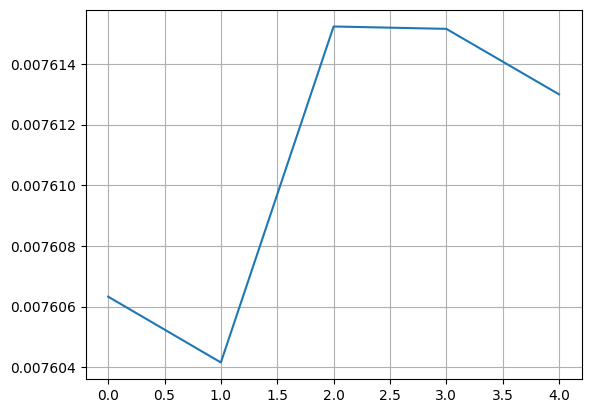

In [79]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [81]:
type(history.history['loss'])

list

### Тестирование обученной модели

In [ ]:
print(x_test.shape, y_test.shape, x_test.dtype, y_test.dtype)

(201, 256, 256) (201, 256, 256, 2) float64 float64


In [84]:
import matplotlib.pyplot as plt

max_veiw_samples = 10

for n in range(x_test.shape[0]):
  if n > max_veiw_samples: break
  grayscale = x_test[n].astype(np.uint8)

  target = model.predict(np.expand_dims(x_test[n],  axis=(0,3)))  # Теперь target.shape должен быть (1, 400, 400, 2)
  cur = np.zeros((256, 256, 3))
  cur[:,:,0] = np.squeeze(x_test[n])
  cur[:,:,1:] = 128*target[0]
  cur_rgb = (lab2rgb(cur) * 255).astype(np.uint8)

  orig = np.zeros((256, 256, 3))
  orig[:,:,0] = x_test[n]
  orig[:,:,1:] =  y_test[n]
  orig_rgb = (lab2rgb(orig) * 255).astype(np.uint8)


  plt.figure(figsize=(15, 10))


  plt.subplot(1, 3, 1)
  plt.imshow(np.squeeze(grayscale), cmap='gray')
  plt.axis('off')
  plt.title('Grayscale image')

  plt.subplot(1, 3, 2)
  plt.imshow(orig_rgb)
  plt.axis('off')
  plt.title('Original image')

  plt.subplot(1, 3, 3)
  plt.imshow(cur_rgb)
  plt.axis('off')
  plt.title('Predicted image')

  plt.show()


In [ ]:

# print(model.evaluate(X, Y, batch_size=1))
output = model.predict()
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

cur_rgb = (lab2rgb(cur) * 255).astype(np.uint8)
imsave("img_result.png", cur_rgb)
cur_rgb

### Сохраниение

In [ ]:
!git add alpha_version_notebook.ipynb

In [ ]:
!git commit -m "Добавил возможность рекурсивно загружать изображения для обучающей выборки из заданной п "

[alhpa-version 173023f] Добавил датасет изображений для обучения модели
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Alpha-version/alpha_version_notebook.ipynb (93%)


In [ ]:
!sh git_push.sh

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 4.73 KiB | 115.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Evgev/Coloring-greyscale-images.git
   fb18f3d..173023f  alhpa-version -> alhpa-version


In [ ]:
!git log

commit fe81e612b8c8af77815809cc0187ea2c2815f36a (HEAD -> alhpa-version)
Author: Evgev <evgeny_skr@mail.ru>
Date:   Sat Nov 23 18:37:52 2024 +0000

    Добавил датасет изображений для обучения модели

commit fb18f3dc8829cdf39a597f964b069d0a09322060
Author: Evgev <evgeny_skr@mail.ru>
Date:   Sat Nov 23 14:04:49 2024 +0000

    Добавил тестирование на изображениях, не из обучающей выборки

commit 23b43e3a104555b7b6adaabc0d98a6fe0f5dfd7e (origin/alhpa-version, origin/HEAD)
Author: root <root@Iphone.>
Date:   Sat Nov 23 12:05:23 2024 +0300

    add alpha-version

commit d9a4762fdf648f7254a3e7461b2d2c9afc6b0699
Author: root <root@Iphone.>
Date:   Sat Nov 23 11:51:30 2024 +0300

    add Alpha-version


In [ ]:
!git reset

Unstaged changes after reset:
M	Alpha-version/alpha_version_notebook.ipynb


In [ ]:
!git reset --soft fb18f3dc8829cdf39a597f964b069d0a09322060
